<a href="https://colab.research.google.com/github/A24bhi/Neural-Network-Using-Tenserflow-and-Keras/blob/main/Neural_Network_Using_tensor_and_Kerras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
np.random.seed(10)

num_samples = 10000
X = np.random.rand(num_samples,3) * np.array([24,10,60])
Y = np.random.rand(num_samples) * 100

In [5]:
pd.DataFrame(X, columns=["hours_of_sleep","cups_of_coffee","travel_time"]).head(5)

,hours_of_sleep,cups_of_coffee,travel_time
0,18.511695,0.207519,38.018894
1,17.971293,4.985070,13.487799
2,4.753509,7.605307,10.146650
3,2.120156,6.853598,57.203601
4,0.094758,5.121923,48.757258


In [6]:

def create_custom_model():
    #simple input layer (code)
    inputs = keras.Input(shape=(3,))

    #First layer with 2 neurons
    x = layers.Dense(2, activation="sigmoid")(inputs)

    #output layer
    outputs = layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [7]:
model = create_custom_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
             loss="mean_squared_error")
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.10, random_state=10)

history = model.fit(X, Y , epochs=150, batch_size=32, validation_split=0.20, verbose=1) #no


Epoch 1/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3153.3435 - val_loss: 2822.6311
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2640.7344 - val_loss: 2420.0862
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2293.9517 - val_loss: 2086.0088
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2010.7473 - val_loss: 1808.3123
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1701.3182 - val_loss: 1579.2559
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1487.3666 - val_loss: 1393.0874
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1331.4240 - val_loss: 1243.4672
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1180.1195 - val_loss: 1125.9447
Epoch 9/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1081.7070 - val_loss: 1036.0605
Epoch 10/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 999.4198 - val_loss: 968.7142
Epoch 11/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 960.2004 

In [9]:
test_loss = model.evaluate(X, Y, verbose=1)
print(f"Test loss : {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 836.3618
Test loss : 835.3452758789062


In [11]:
sample_data = np.array([[7,3,25]])

In [12]:
prediction = model.predict(sample_data)
print(f"Prediction for 7,3,25 is :{prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for 7,3,25 is :[[50.045647]]


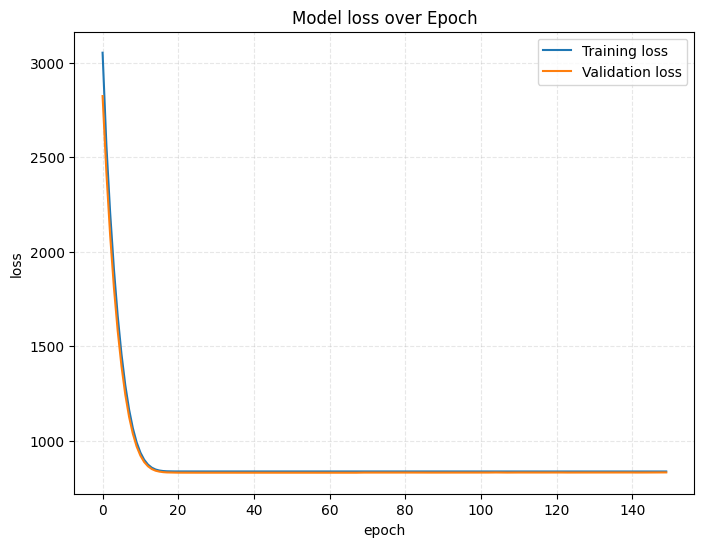

In [13]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Model loss over Epoch")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid(True, alpha=0.3,linestyle="--")